# Figuras del reporte

In [1]:
from utils import *
from utils1 import *
from scipy import integrate

# Solución de la ecuación `poner numero de ecuacion`

In [2]:
def g(t,y):
    if np.abs(y)<0.01:
        return 1
    else:
        return np.sqrt(4*y**2-4*y**4)/(2*y**2)




In [3]:
#extreme values
a,b =-1,0
alpha=0
sol2=RK4(g,a,b,alpha,N=1000)
print(sol2[0][499])
sol2=sol2[1]
print(sol2)

-0.5009999999999996
[0.         0.001      0.002      0.003      0.004      0.005
 0.006      0.007      0.008      0.009      0.02649917 0.05213946
 0.06866694 0.08191141 0.09328329 0.10340241 0.11260701 0.12110582
 0.12903837 0.1365034  0.14357388 0.15030548 0.15674188 0.16291807
 0.1688626  0.17459913 0.18014754 0.1855247  0.1907451  0.19582128
 0.20076417 0.20558339 0.21028745 0.2148839  0.21937951 0.22378036
 0.22809193 0.23231919 0.23646667 0.24053849 0.24453843 0.24846996
 0.25233629 0.25614035 0.2598849  0.26357246 0.26720539 0.27078589
 0.27431602 0.27779769 0.28123271 0.28462276 0.28796943 0.29127422
 0.29453854 0.29776372 0.30095101 0.30410161 0.30721665 0.31029719
 0.31334426 0.31635883 0.3193418  0.32229407 0.32521646 0.32810977
 0.33097478 0.3338122  0.33662273 0.33940704 0.34216578 0.34489955
 0.34760894 0.35029453 0.35295685 0.35559642 0.35821376 0.36080933
 0.36338362 0.36593706 0.3684701  0.37098314 0.3734766  0.37595086
 0.3784063  0.38084329 0.38326217 0.38566328 0.

## Grafica 1

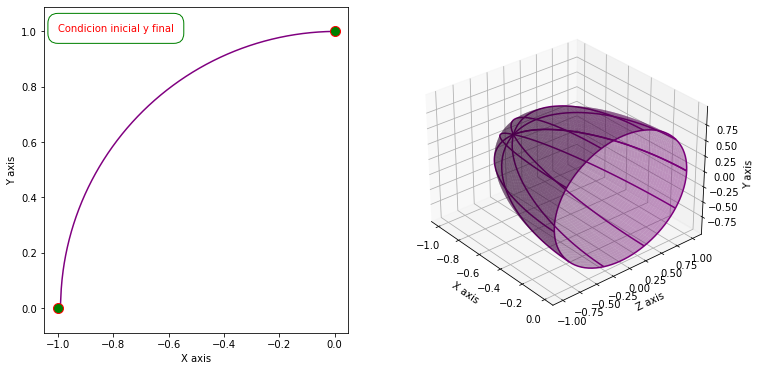

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math

n = 100

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

#extremos del intervalo
a,b =-1,0

#initial conditions
xa, xb= 0, 1

#dominio de la funcion
t=np.arange(a,b, step=0.001)

#funcion solucion evaluada en cada t
y_t=sol2#np.sqrt(1-t**2)

#parametro 2 de la parametrizacion
theta = np.linspace(0, 2*np.pi, n)
#creamos una malla para t,theta
T, THETA = np.meshgrid(t, theta)
#REFERENCIA PARA MESHGRID: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#coordenadas del solido de revolucion
Y_T = np.ones((n, 1))*y_t #matrix whose rows are reapeted and equal to the solution vector
Y = Y_T*np.cos(THETA)
Z = Y_T*np.sin(THETA)

###GRAFICAS

####Grafica de funcion a rotar
ax1.plot(t,y_t,'purple')
ax1.plot(a, xa,b,xb, marker="o", markersize=10, markeredgecolor="red", 
         markerfacecolor="green", label='condicion final e inicial') #graficando condicion inicial y final

ax1.text(-1, xb, 'Condicion inicial y final', color='red', 
        bbox=dict(facecolor='none', edgecolor='green', boxstyle='round,pad=1'))

#### Grafica solido revolucion
ax2.plot_wireframe(T, Y, Z,rcount=10,ccount=1, color='purple') #mostrar las secciones del solido
ax2.plot_surface(T, Y, Z, color='purple', alpha=0.4)
ax2.view_init(elev=30, azim=-40) #para rotar la grafica

#etiquetar ejes:
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Z axis')
ax2.set_zlabel('Y axis')
ax1.axis('equal')
plt.show()

# Superficies de Delaunay

Probaremos diferentes configurtaciones de los hiperparametros para obtener las superficies de Delaunay. Recordemos que la ecuación a resolver es:
$$
    \dot{x}=\pm\frac{\sqrt{4x^2-(\lambda x^2-k_1)^2}}{\lambda x^2-k_1}
$$

# Primer sup de Delaunay

In [4]:
k1= np.arange(start=-10, stop=10, step=1, dtype=float) #hiperparametro de la ecuacion diferencial np.arange(start=-5, stop=5, num=50)
Lambda= np.arange(start=-2,stop=2, step=0.1, dtype=float) #hiperparametro de la EDO

#condiciones de controno
a= -2
b= 10
xa= 10
xb= 1196
vol= 5615200

In [5]:
superficie1=delaunay(k1=k1,Lambda=Lambda,a=a,b=b,xa=xa,xb=xb,vol=vol)
print(superficie1)

5610712.72726831
0.0007991296359327782
Se encontró una solución tal que
Los parametros que mejor se ajustan son 1.7763568394002505e-15 -5.0
El volumen de la mejor superficie es 5610712.72726831
El error relativo entre el volumen objetivo y volumen aproximado es 4487.272731689736
(array([-2.   , -1.999, -1.998, ...,  9.997,  9.998,  9.999]), array([  10.        ,   10.00387378,   10.00774917, ..., 1194.3790612 ,
       1194.85690734, 1195.33494466]), 5610712.72726831, 4487.272731689736, (1.7763568394002505e-15, -5.0))


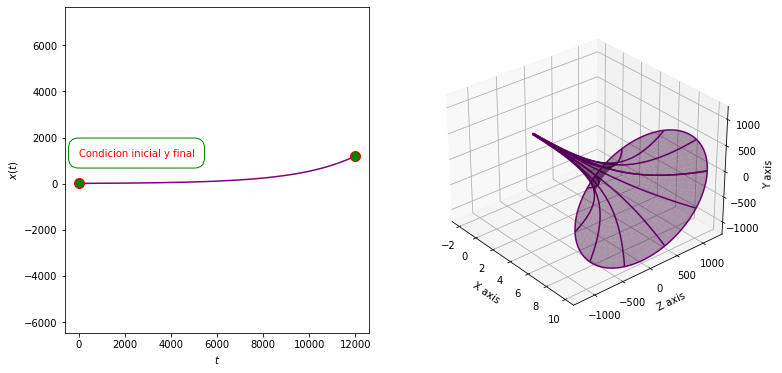

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math

n = 100

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')


#dominio de la funcion
t=superficie1[0]

#funcion solucion evaluada en cada t
y_t=superficie1[1]

#parametro 2 de la parametrizacion
theta = np.linspace(0, 2*np.pi, n)
#creamos una malla para t,theta
T, THETA = np.meshgrid(t, theta)
#REFERENCIA PARA MESHGRID: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#coordenadas del solido de revolucion
Y_T = np.ones((n, 1))*y_t #matrix whose rows are reapeted and equal to the solution vector
Y = Y_T*np.cos(THETA)
Z = Y_T*np.sin(THETA)

###GRAFICAS

####Grafica de funcion a rotar
ax1.plot(np.arange(0,12000,step=1),y_t,'purple')
ax1.plot(a, xa,12000,xb, marker="o", markersize=10, markeredgecolor="red", 
         markerfacecolor="green", label='condicion final e inicial') #graficando condicion inicial y final
ax1.text(-1, xb, 'Condicion inicial y final', color='red', 
        bbox=dict(facecolor='none', edgecolor='green', boxstyle='round,pad=1'))
plt.ylim=xa-1,xb+1
#### Grafica solido revolucion
ax2.plot_wireframe(T, Y, Z,rcount=10,ccount=1, color='purple') #mostrar las secciones del solido
ax2.plot_surface(T, Y, Z, color='purple', alpha=0.4)
ax2.view_init(elev=30, azim=-40) #para rotar la grafica

#etiquetar ejes:
ax1.set_xlabel('$t$')
ax1.set_ylabel('$x(t)$')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Z axis')
ax2.set_zlabel('Y axis')
ax1.axis('equal')
plt.show()